Author: François Mercier

Goal: Exploratory Data Analysis

# Imports

Additional requirements for this notebook (not part of main requirements)
```
pip install --no-index matplotlib 
pip install --no-index scikit-learn
pip install --no-index seaborn
pip install fastprogress
````

Additional requirements to be part of main requirements (used by TAs utilities functions)

```
pip install opencv-python
pip install lz4
pip install --no-index tqdm
pip install --no-index h5netcdf
````

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path
import pandas as pd
import numpy as np

from fastprogress import progress_bar

import h5netcdf
import cv2 as cv

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
tf.__version__

'2.0.0'

In [5]:
import sys
sys.path.append("..") # Require to have the utilities packages in path
from utilities.utils import *

In [6]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

# Check data folder

In [7]:
!ls /project/cq-training-1/project1/data/

catalog.helios.public.20100101-20160101.pkl  dummy_test_cfg.json  hdf5v7_8bit
dummy_test_catalog.pkl			     hdf5v5_16bit	  netcdf


## Test dataframe data

In [8]:
data_path = Path(r"/project/cq-training-1/project1/data/")

In [9]:
df_dummy_test_catalog = pd.read_pickle(data_path/"dummy_test_catalog.pkl")
df_dummy_test_catalog.shape

(35040, 19)

In [20]:
df_dummy_test_catalog.head()

ncdf_path  \
iso-datetime                                                             
2015-01-01 00:00:00                                                nan   
2015-01-01 00:15:00  /project/cq-training-1/project1/data/netcdf/GO...   
2015-01-01 00:30:00                                                nan   
2015-01-01 00:45:00  /project/cq-training-1/project1/data/netcdf/GO...   
2015-01-01 01:00:00  /project/cq-training-1/project1/data/netcdf/GO...   

                                                        hdf5_8bit_path  \
iso-datetime                                                             
2015-01-01 00:00:00  /project/cq-training-1/project1/data/hdf5v7_8b...   
2015-01-01 00:15:00  /project/cq-training-1/project1/data/hdf5v7_8b...   
2015-01-01 00:30:00  /project/cq-training-1/project1/data/hdf5v7_8b...   
2015-01-01 00:45:00  /project/cq-training-1/project1/data/hdf5v7_8b...   
2015-01-01 01:00:00  /project/cq-training-1/project1/data/hdf5v7_8b...   

                    hdf5_8bit_offset  \
iso-datetime                           
2015-01-01 00:00:00               64   
2015-01-01 00:15:00               65   
2015-01-01 00:30:00               66   
2015-01-01 00:45:00               67   
2015-01-01 01:00:00               68   

                                                       hdf5_16bit_path  \
iso-datetime                                                             
2015-01-01 00:00:00  /project/cq-training-1/project1/data/hdf5v5_16...   
2015-01-01 00:15:00  /project/cq-training-1/project1/data/hdf5v5_16...   
2015-01-01 00:30:00  /project/cq-training-1/project1/data/hdf5v5_16...   
2015-01-01 00:45:00  /project/cq-training-1/project1/data/hdf5v5_16...   
2015-01-01 01:00:00  /project/cq-training-1/project1/data/hdf5v5_16...   

                    hdf5_16bit_offset  BND_DAYTIME  BND_CLEARSKY_GHI  \
iso-datetime                                                           
2015-01-01 00:00:00                64            0               0.0   
2015-01-01 00:15:00                65            0               0.0   
2015-01-01 00:30:00                66            0               0.0   
2015-01-01 00:45:00                67            0               0.0   
2015-01-01 01:00:00                68            0               0.0   

                     TBL_DAYTIME  TBL_CLEARSKY_GHI  DRA_DAYTIME  \
iso-datetime                                                      
2015-01-01 00:00:00            0               0.0            1   
2015-01-01 00:15:00            0               0.0            1   
2015-01-01 00:30:00            0               0.0            1   
2015-01-01 00:45:00            0               0.0            0   
2015-01-01 01:00:00            0               0.0            0   

                     DRA_CLEARSKY_GHI  FPK_DAYTIME  FPK_CLEARSKY_GHI  \
iso-datetime                                                           
2015-01-01 00:00:00         52.262615            0               0.0   
2015-01-01 00:15:00         18.440082            0               0.0   
2015-01-01 00:30:00          1.445237            0               0.0   
2015-01-01 00:45:00          0.000000            0               0.0   
2015-01-01 01:00:00          0.000000            0               0.0   

                     GWN_DAYTIME  GWN_CLEARSKY_GHI  PSU_DAYTIME  \
iso-datetime                                                      
2015-01-01 00:00:00            0               0.0            0   
2015-01-01 00:15:00            0               0.0            0   
2015-01-01 00:30:00            0               0.0            0   
2015-01-01 00:45:00            0               0.0            0   
2015-01-01 01:00:00            0               0.0            0   

                     PSU_CLEARSKY_GHI  SXF_DAYTIME  SXF_CLEARSKY_GHI  
iso-datetime                                                          
2015-01-01 00:00:00               0.0            0               0.0  
2015-01-01 00:15:00               0.0            0          

## Train dataframe

Github project documentation link

https://github.com/mila-iqia/ift6759/blob/master/projects/project1/dataframe.md

In [10]:
df_train_catalog = pd.read_pickle(data_path/"catalog.helios.public.20100101-20160101.pkl")
df_train_catalog.shape

(210336, 33)

In [19]:
df_train_catalog.head()

ncdf_path hdf5_8bit_path hdf5_8bit_offset hdf5_16bit_path  \
iso-datetime                                                                    
2010-01-01 00:00:00       nan            nan              NaN             nan   
2010-01-01 00:15:00       nan            nan              NaN             nan   
2010-01-01 00:30:00       nan            nan              NaN             nan   
2010-01-01 00:45:00       nan            nan              NaN             nan   
2010-01-01 01:00:00       nan            nan              NaN             nan   

                    hdf5_16bit_offset  BND_DAYTIME  BND_CLEARSKY_GHI  \
iso-datetime                                                           
2010-01-01 00:00:00               NaN            0               0.0   
2010-01-01 00:15:00               NaN            0               0.0   
2010-01-01 00:30:00               NaN            0               0.0   
2010-01-01 00:45:00               NaN            0               0.0   
2010-01-01 01:00:00               NaN            0               0.0   

                    BND_CLOUDINESS  BND_GHI  TBL_DAYTIME  ...  GWN_CLOUDINESS  \
iso-datetime                                              ...                   
2010-01-01 00:00:00          night     -4.1            0  ...           night   
2010-01-01 00:15:00          night     -4.1            0  ...           night   
2010-01-01 00:30:00          night     -4.1            0  ...           night   
2010-01-01 00:45:00          night     -4.1            0  ...           night   
2010-01-01 01:00:00          night     -4.1            0  ...           night   

                      GWN_GHI  PSU_DAYTIME  PSU_CLEARSKY_GHI  PSU_CLOUDINESS  \
iso-datetime                                                                   
2010-01-01 00:00:00 -7.500000            0               0.0           night   
2010-01-01 00:15:00 -7.493333            0               0.0           night   
2010-01-01 00:30:00 -7.420000            0               0.0           night   
2010-01-01 00:45:00 -7.533333            0               0.0           night   
2010-01-01 01:00:00 -7.586667            0               0.0           night   

                      PSU_GHI  SXF_DAYTIME  SXF_CLEARSKY_GHI  SXF_CLOUDINESS  \
iso-datetime                                                                   
2010-01-01 00:00:00 -1.500000            0               0.0           night   
2010-01-01 00:15:00 -1.446667            0               0.0           night   
2010-01-01 00:30:00 -1.766667            0               0.0           night   
2010-01-01 00:45:00 -2.033333            0               0.0           night   
2010-01-01 01:00:00 -2.006667            0               0.0           night   

                      SXF_GHI  
iso-datetime                   
2010-01-01 00:00:00 -3.800000  
2010-01-01 00:15:00 -3.893333  
2010-01-01 00:30:00 -4.166667  
2010-01-01 00:45:00 -4.040000  
2010-01-01 01:00:00 -4.133333  

[5 rows x 33 columns]

# EDA

## Check general temporal structure of GHI data w.r.t. stations

Inspiration https://stackoverflow.com/questions/46045750/python-distplot-with-multiple-distributions

In [18]:
stations = ["BND", "TBL", "DRA", "FPK", "GWN", "PSU"]

In [35]:
df_train_catalog_day = df_train_catalog.groupby(pd.Grouper(freq='D')).mean()#.reset_index()

Text(0, 0.5, 'GHI')

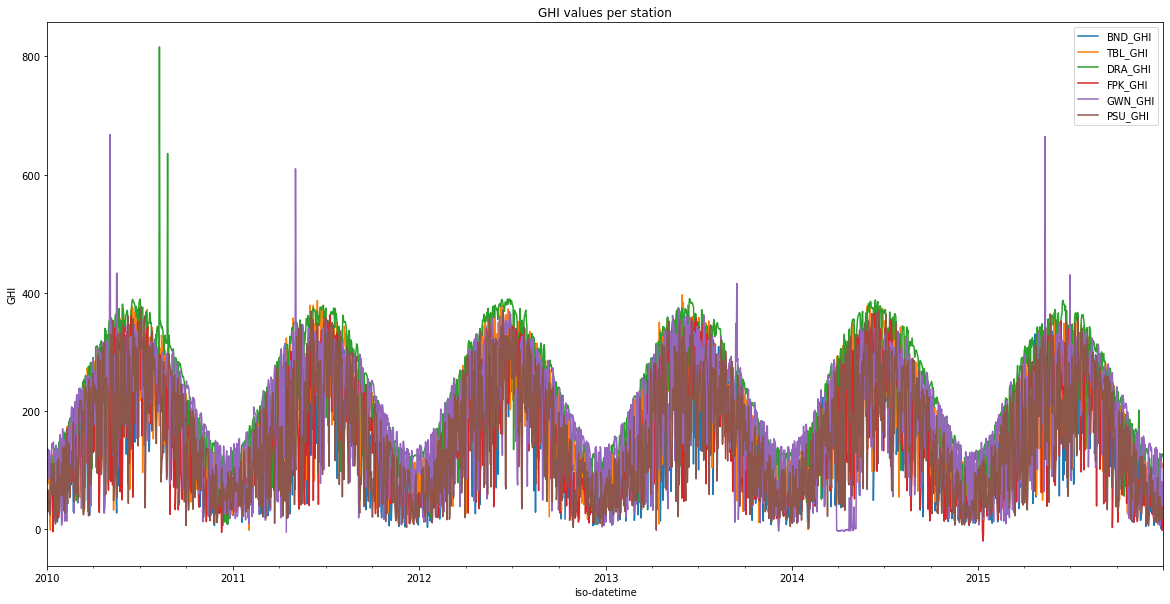

In [46]:
data = df_train_catalog_day[[s + "_GHI" for s in stations]]
ax = data.plot(figsize=(20, 10), title="GHI daily mean values per station")#.hist(subplots=True, legend=True, figsize=(10, 10))
ax.set_ylabel("GHI")

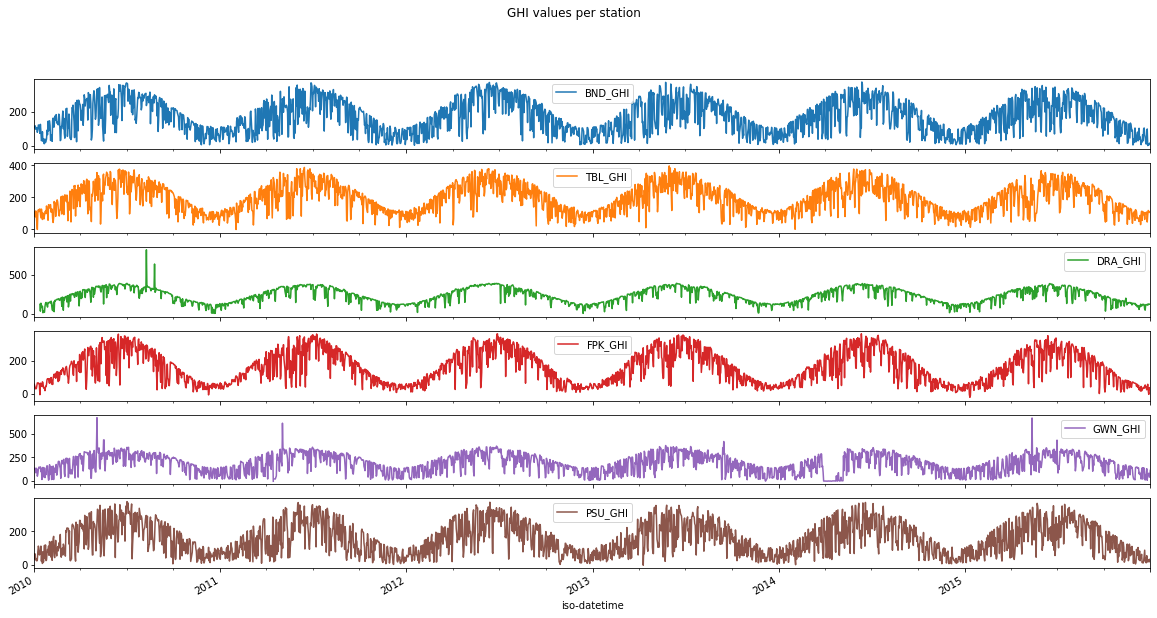

In [50]:
data = df_train_catalog_day[[s + "_GHI" for s in stations]]
ax = data.plot(subplots=True, layout=(len(data.columns), 1), figsize=(20, 10), title="GHI daily mean values per station")

In [53]:
list(range(2010, 2015))

[2010, 2011, 2012, 2013, 2014]

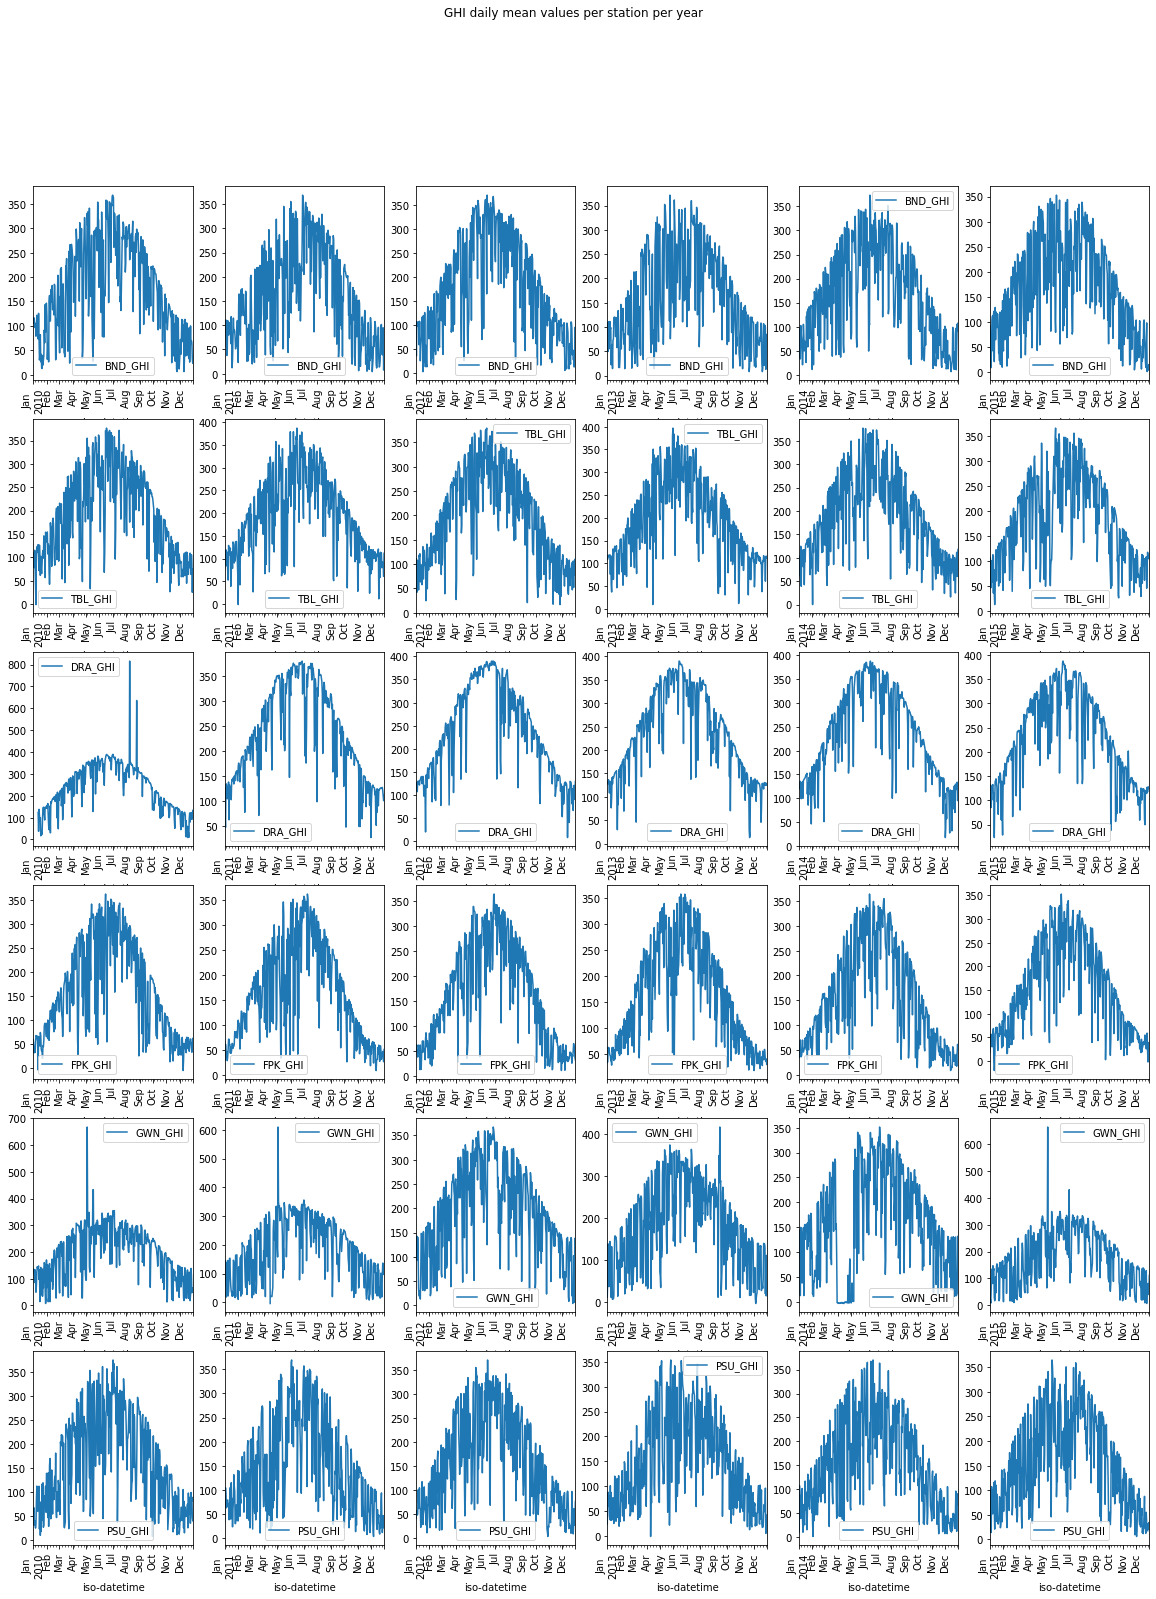

In [237]:
period = list(range(2010, 2016))

fig, axes = plt.subplots(nrows=len(stations), ncols=len(period), figsize=(20, 25))
fig.suptitle("GHI daily mean values per station per year")


for i, s in enumerate([s + "_GHI" for s in stations]):
    for j, year in enumerate(period):
        ax = df_train_catalog_day.loc[df_train_catalog_day.index.year == year, [s]].plot(ax=axes[i,j], rot=90)

In [176]:
df_train_catalog[[s + "_GHI" for s in stations]].min()

BND_GHI    -7.006667
TBL_GHI    -9.513333
DRA_GHI   -12.473333
FPK_GHI   -30.000000
GWN_GHI   -15.713333
PSU_GHI    -8.553333
dtype: float64

-30.000000000089443


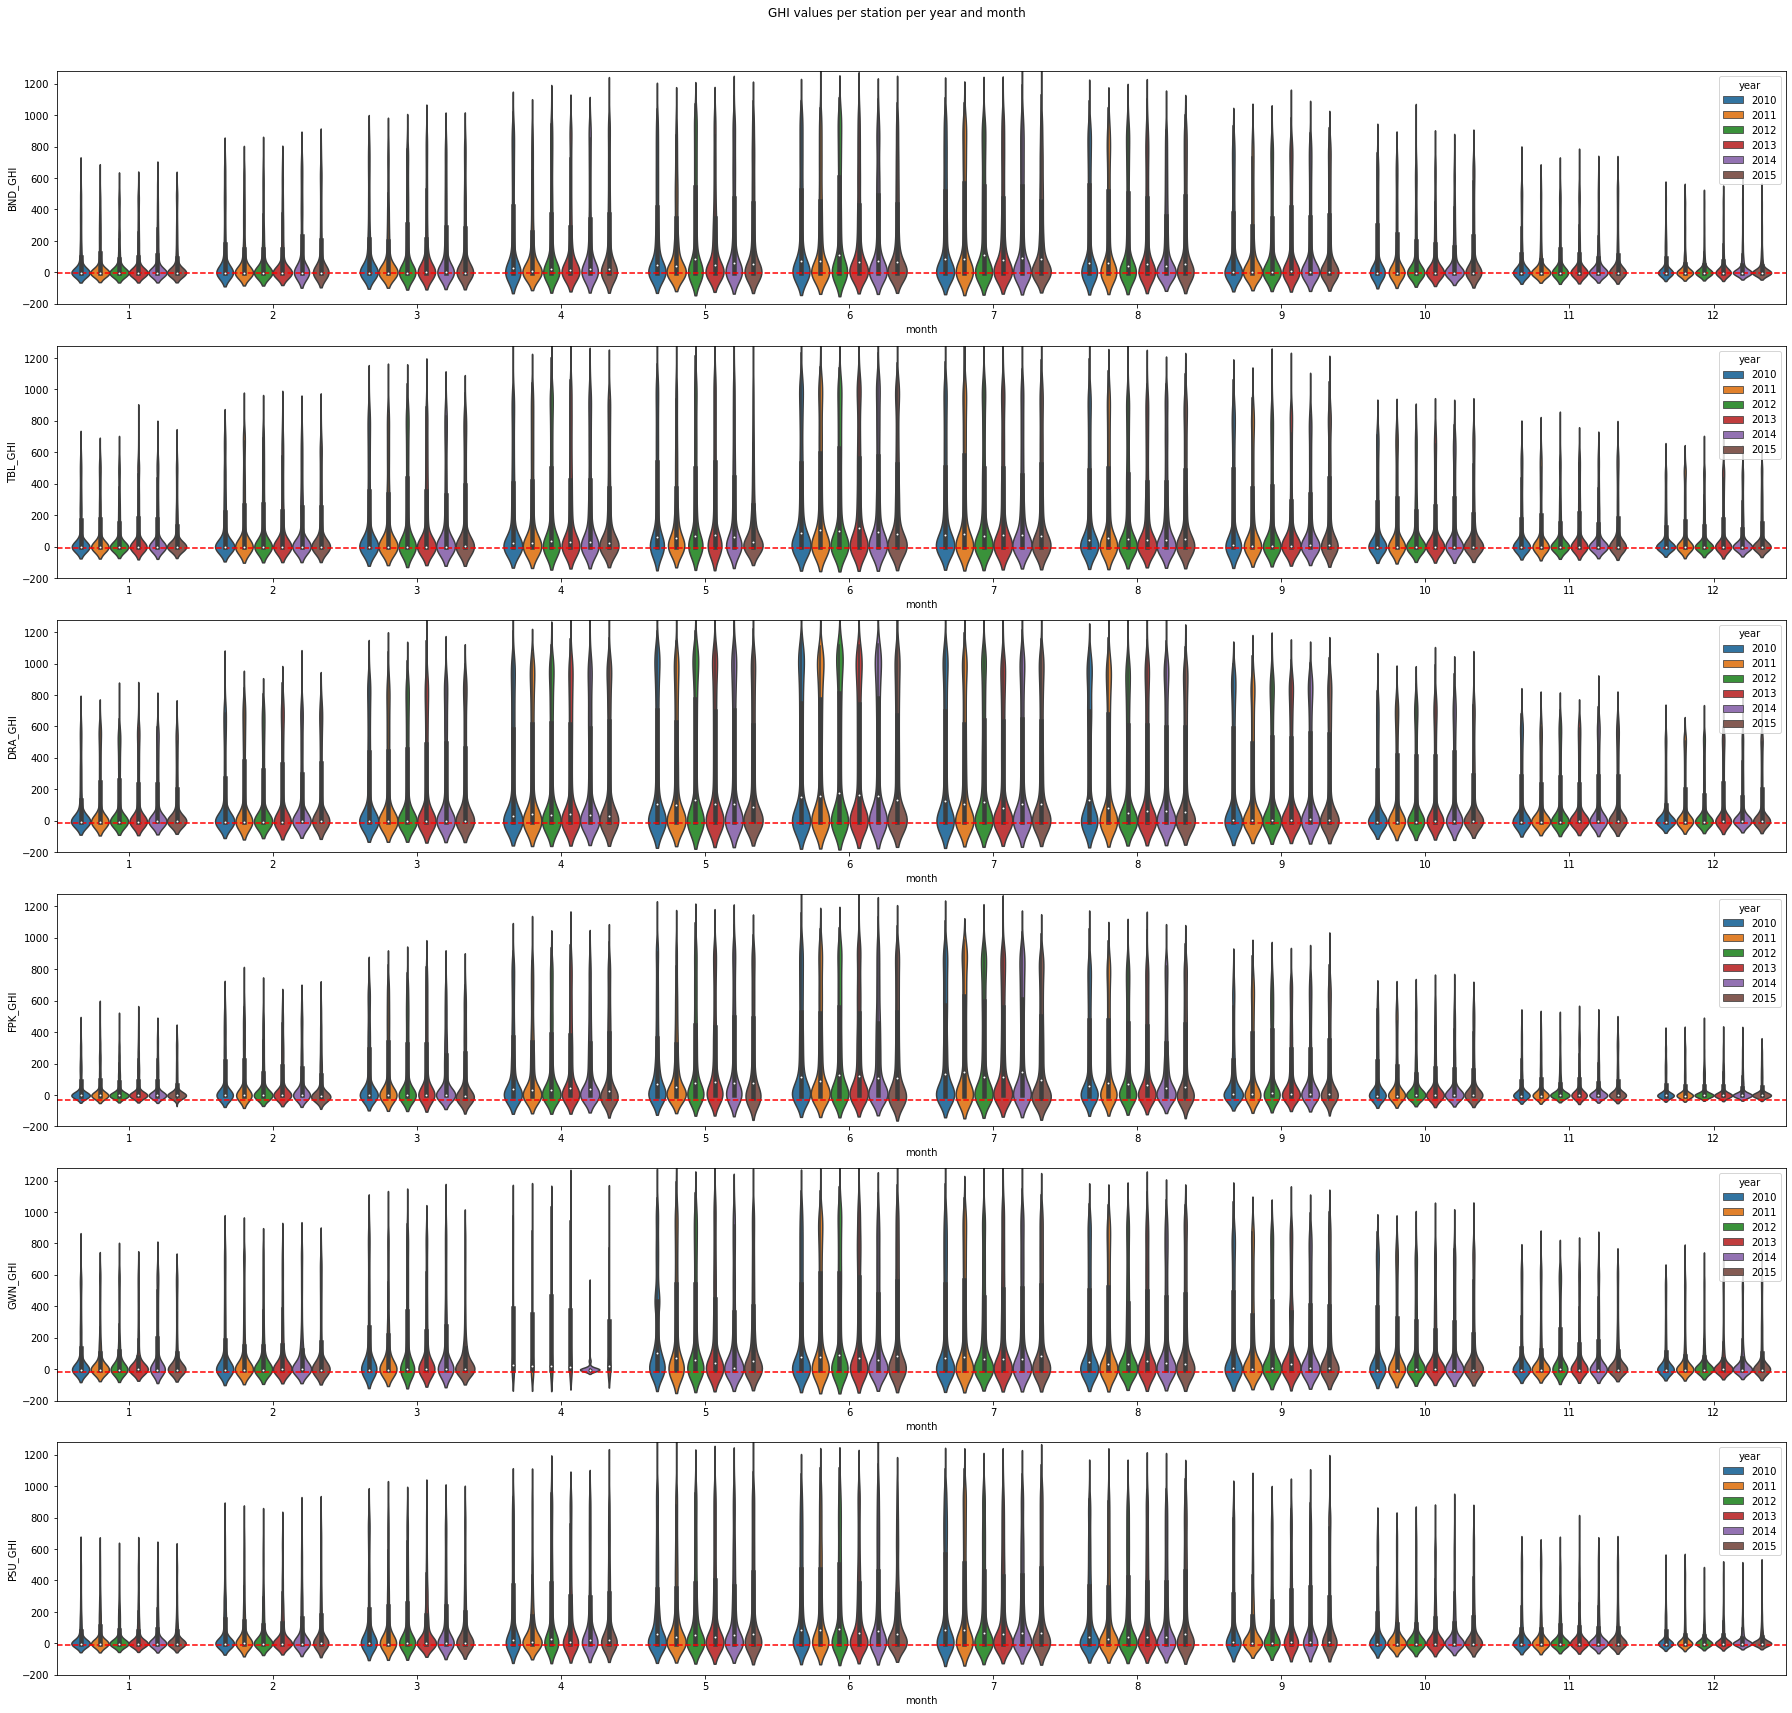

In [182]:
fig, axes = plt.subplots(nrows=len(stations), ncols=1, figsize=(25, 25))
fig.suptitle("GHI values per station per year and month")

min_df, max_df = df_train_catalog[[s + "_GHI" for s in stations]].min().min(), df_train_catalog[[s + "_GHI" for s in stations]].max().max()
print(min_df)

count = 0
for i, s in enumerate([s + "_GHI" for s in stations]):
    data = df_train_catalog
    data = data.assign(month=data.index.month, year=data.index.year)

    ax = sns.violinplot(data=data, x="month", y=s, hue="year", ax=axes[count])
    axes[count].set_ylim(bottom=-200, top=max_df)
    axes[count].axhline(y=data[s].min(), color="r", linestyle="--")
    count += 1
    
# https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [192]:
for s in stations:
    min_df = df_train_catalog.loc[df_train_catalog[s + "_DAYTIME"] == True, s + "_GHI"].min()
    max_df = df_train_catalog.loc[df_train_catalog[s + "_DAYTIME"] == True, s + "_GHI"].max()
    print(s, min_df, max_df)

BND -5.673333333328555 1193.3266666666584
TBL -7.6799999999755615 1278.5533333333487
DRA -8.52000000000144 1276.5933333333423
FPK -29.200000000033352 1159.113333333334
GWN -7.293333333328736 1206.506666666674
PSU -4.8466666666621725 1200.840000000019


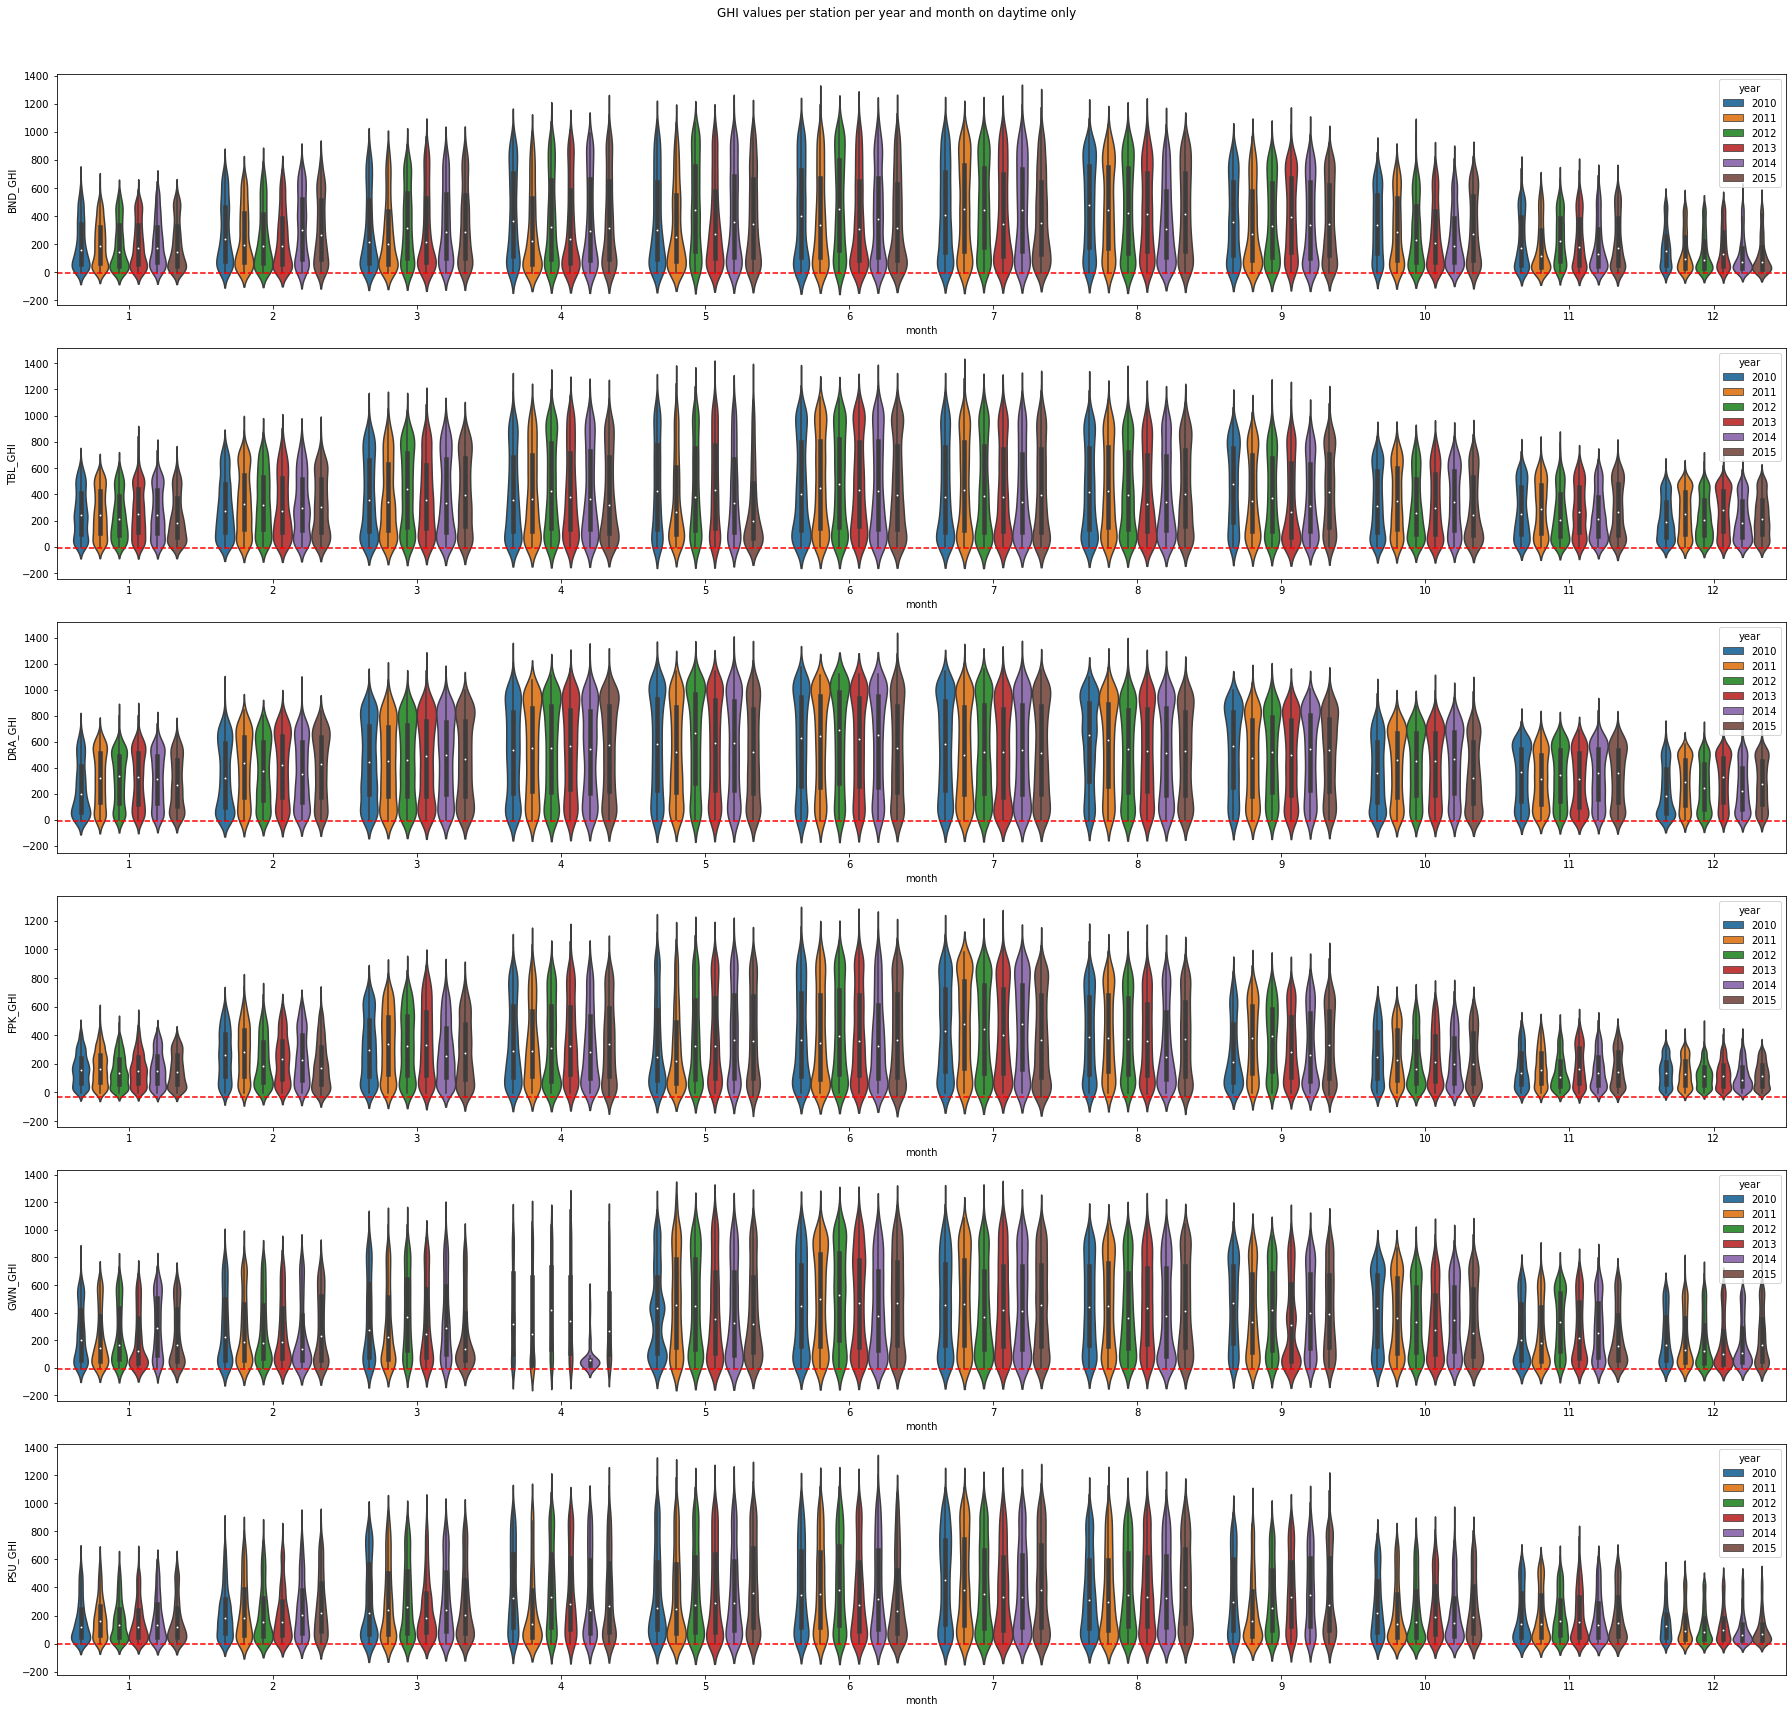

In [191]:
fig, axes = plt.subplots(nrows=len(stations), ncols=1, figsize=(25, 25))
fig.suptitle("GHI values per station per year and month on daytime only")


count = 0
for i, s in enumerate(stations):
    data = df_train_catalog.loc[df_train_catalog[s + "_DAYTIME"] == True, :]
    data = data.assign(month=data.index.month, year=data.index.year)

    ax = sns.violinplot(data=data, x="month", y=s + "_GHI", hue="year", ax=axes[count])
#    axes[count].set_ylim(bottom=-200, top=max_df)
    axes[count].axhline(y=data[s + "_GHI"].min(), color="r", linestyle="--")
    count += 1
    
# https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Check distribution of GHI missing data wrt time


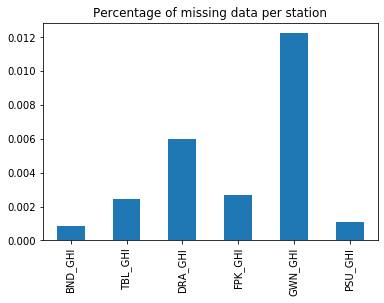

In [69]:
df = df_train_catalog[[s + "_GHI" for s in stations]].isna()

df = df.sum(axis=0) / df.shape[0]

ax = df.plot.bar(title="Percentage of missing data per station")

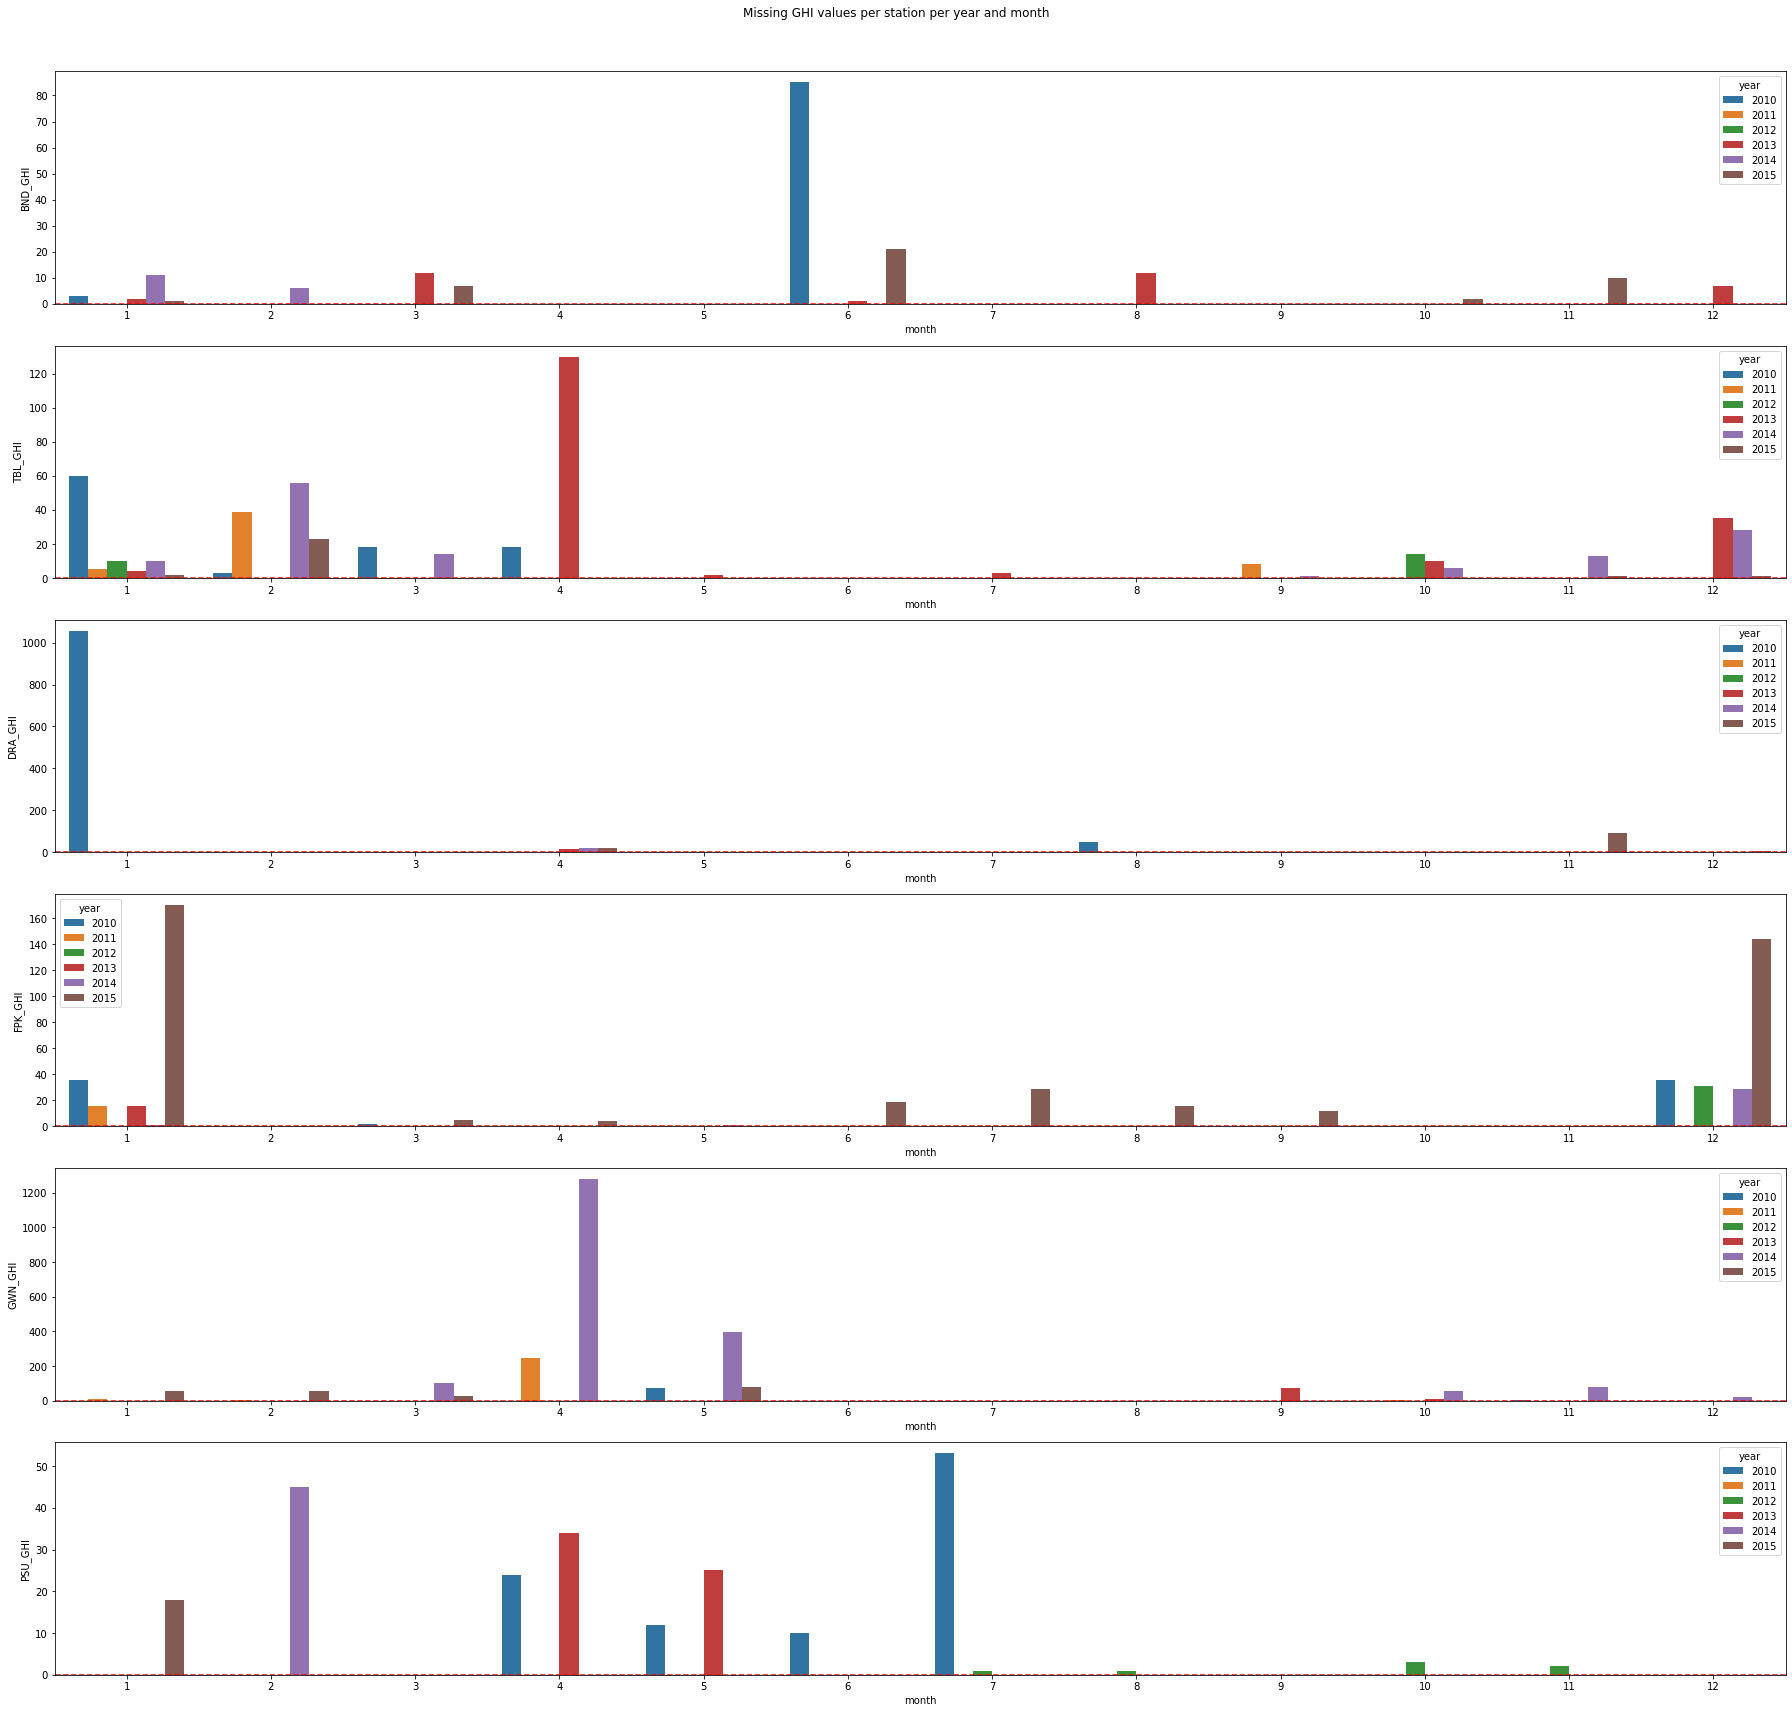

In [46]:
df = df_train_catalog[[s + "_GHI" for s in stations]].isna()


fig, axes = plt.subplots(nrows=len(stations), ncols=1, figsize=(25, 25))
fig.suptitle("Missing GHI values per station per year and month")


count = 0
for i, s in enumerate(stations):
    data = df.groupby(pd.Grouper(freq="M")).sum()
    data = data.assign(month=data.index.month, year=data.index.year)

    ax = sns.barplot(data=data, x="month", y=s + "_GHI", hue="year", ax=axes[count])
#    axes[count].set_ylim(bottom=-200, top=max_df)
    axes[count].axhline(y=data[s + "_GHI"].min(), color="r", linestyle="--")
    count += 1
    
# https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


In [58]:
# Percentage of missing values for each station

df = df_train_catalog[[s + "_GHI" for s in stations]].isna()

df.groupby(pd.Grouper(freq="Y")).sum() / (df == 0).sum()


BND_GHI   TBL_GHI   DRA_GHI   FPK_GHI   GWN_GHI   PSU_GHI
iso-datetime                                                            
2010-12-31    0.000419  0.000472  0.005276  0.000353  0.000371  0.000471
2011-12-31    0.000000  0.000248  0.000000  0.000076  0.001280  0.000000
2012-12-31    0.000000  0.000114  0.000005  0.000148  0.000000  0.000033
2013-12-31    0.000162  0.000877  0.000077  0.000076  0.000409  0.000281
2014-12-31    0.000081  0.000610  0.000086  0.000148  0.009280  0.000214
2015-12-31    0.000195  0.000129  0.000574  0.001902  0.001054  0.000086

# Conclusion so far on GHI data

GHI
- Yearly seasonality (according to season)
- Trends accross time period look quite stationary
- Some outliers, especially for DRA and GWN stations
- Low volatility for DRA station and high volatility for BND ,PSU and TBL stations
- GWN seem to have been disconnected during April and May 2014
- Distribution for GWI is highly skewed by keeping observation during nightime
- Minimum values are still negative even during daytime, and roughly the same with negative values
- FPK has got a lower minimum value compared to others
- The volatility is higher during summer period than other seasons
- Distribution doesn't change much accros year for all stations except GWI for April 2014. It's related to missing data


Missing data
- Some missing GHI data (maximum **1%** of total observations for GWN station)



### NCDF data

Note: Missing is only at observation level (i.e. timestamp)

In [19]:
df = df_train_catalog
df = df.assign(year=df.index.year, month=df.index.month, missing=df["ncdf_path"] == "nan")
print("% Missing data over total observations", df.missing.mean())



% Missing data over total observations 0.17409763426137229


In [20]:
pivot = df.groupby(["year", "month", "missing"]).size() / df.shape[0]
pivot = pivot.reset_index().rename({0: "pct"}, axis=1)
pivot[pivot.missing].sort_values(by="pct", ascending=False)[:5]

year  month  missing       pct
0   2010      1     True  0.014149
2   2010      3     True  0.014149
1   2010      2     True  0.012780
64  2012     10     True  0.008681
4   2010      4     True  0.007288

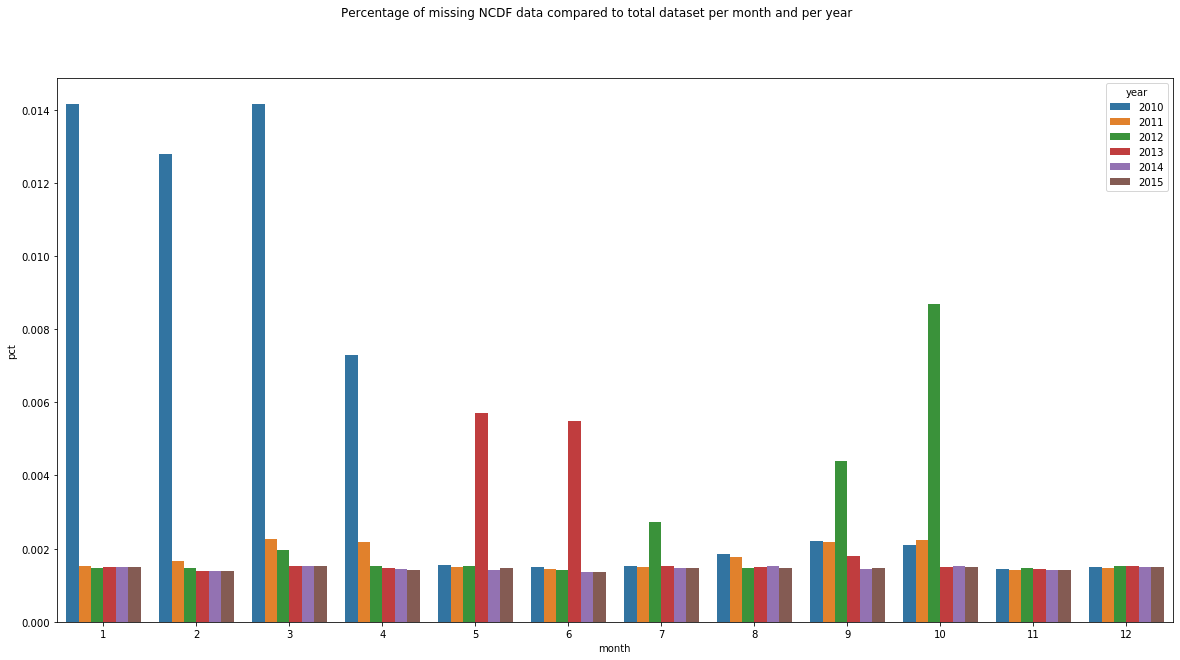

In [22]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle("Percentage of missing NCDF data compared to total dataset per month and per year")

ax = sns.barplot(data=pivot[pivot.missing], x="month", y="pct", hue="year")

## Check missing images

In [41]:
df = df_train_catalog[["ncdf_path", "hdf5_8bit_path", 
                  "hdf5_16bit_path"]].replace("nan", np.nan)

In [42]:
mask = df.isnull().all(1)
print("number of row with no image at all:", mask.sum())

number of row with no image at all: 32


In [43]:
df[mask]

ncdf_path hdf5_8bit_path hdf5_16bit_path
iso-datetime                                                
2010-01-01 00:00:00       NaN            NaN             NaN
2010-01-01 00:15:00       NaN            NaN             NaN
2010-01-01 00:30:00       NaN            NaN             NaN
2010-01-01 00:45:00       NaN            NaN             NaN
2010-01-01 01:00:00       NaN            NaN             NaN
2010-01-01 01:15:00       NaN            NaN             NaN
2010-01-01 01:30:00       NaN            NaN             NaN
2010-01-01 01:45:00       NaN            NaN             NaN
2010-01-01 02:00:00       NaN            NaN             NaN
2010-01-01 02:15:00       NaN            NaN             NaN
2010-01-01 02:30:00       NaN            NaN             NaN
2010-01-01 02:45:00       NaN            NaN             NaN
2010-01-01 03:00:00       NaN            NaN             NaN
2010-01-01 03:15:00       NaN            NaN             NaN
2010-01-01 03:30:00       NaN            NaN             NaN
2010-01-01 03:45:00       NaN            NaN             NaN
2010-01-01 04:00:00       NaN            NaN             NaN
2010-01-01 04:15:00       NaN            NaN             NaN
2010-01-01 04:30:00       NaN            NaN             NaN
2010-01-01 04:45:00       NaN            NaN             NaN
2010-01-01 05:00:00       NaN            NaN             NaN
2010-01-01 05:15:00       NaN            NaN             NaN
2010-01-01 05:30:00       NaN            NaN             NaN
2010-01-01 05:45:00       NaN            NaN             NaN
2010-01-01 06:00:00       NaN            NaN             NaN
2010-01-01 06:15:00       NaN            NaN             NaN
2010-01-01 06:30:00       NaN            NaN             NaN
2010-01-01 06:45:00       NaN            NaN             NaN
2010-01-01 07:00:00       NaN            NaN             NaN
2010-01-01 07:15:00       NaN            NaN             NaN
2010-01-01 07:30:00       NaN            NaN             NaN
2010-01-01 07:45:00       NaN            NaN             NaN

In [44]:
mask = df.isnull().any(1)
print("number of row with at least one missing image:", mask.sum())

number of row with at least one missing image: 36619


In [45]:
df_train_catalog[mask]

ncdf_path  \
iso-datetime                    
2010-01-01 00:00:00       nan   
2010-01-01 00:15:00       nan   
2010-01-01 00:30:00       nan   
2010-01-01 00:45:00       nan   
2010-01-01 01:00:00       nan   
...                       ...   
2015-12-31 12:00:00       nan   
2015-12-31 15:00:00       nan   
2015-12-31 15:30:00       nan   
2015-12-31 18:00:00       nan   
2015-12-31 21:00:00       nan   

                                                        hdf5_8bit_path  \
iso-datetime                                                             
2010-01-01 00:00:00                                                nan   
2010-01-01 00:15:00                                                nan   
2010-01-01 00:30:00                                                nan   
2010-01-01 00:45:00                                                nan   
2010-01-01 01:00:00                                                nan   
...                                                                ...   
2015-12-31 12:00:00  /project/cq-training-1/project1/data/hdf5v7_8b...   
2015-12-31 15:00:00  /project/cq-training-1/project1/data/hdf5v7_8b...   
2015-12-31 15:30:00  /project/cq-training-1/project1/data/hdf5v7_8b...   
2015-12-31 18:00:00  /project/cq-training-1/project1/data/hdf5v7_8b...   
2015-12-31 21:00:00  /project/cq-training-1/project1/data/hdf5v7_8b...   

                    hdf5_8bit_offset  \
iso-datetime                           
2010-01-01 00:00:00              NaN   
2010-01-01 00:15:00              NaN   
2010-01-01 00:30:00              NaN   
2010-01-01 00:45:00              NaN   
2010-01-01 01:00:00              NaN   
...                              ...   
2015-12-31 12:00:00               16   
2015-12-31 15:00:00               28   
2015-12-31 15:30:00               30   
2015-12-31 18:00:00               40   
2015-12-31 21:00:00               52   

                                                       hdf5_16bit_path  \
iso-datetime                                                             
2010-01-01 00:00:00                                                nan   
2010-01-01 00:15:00                                                nan   
2010-01-01 00:30:00                                                nan   
2010-01-01 00:45:00                                                nan   
2010-01-01 01:00:00                                                nan   
...                                                                ...   
2015-12-31 12:00:00  /project/cq-training-1/project1/data/hdf5v5_16...   
2015-12-31 15:00:00  /project/cq-training-1/project1/data/hdf5v5_16...   
2015-12-31 15:30:00  /project/cq-training-1/project1/data/hdf5v5_16...   
2015-12-31 18:00:00  /project/cq-training-1/project1/data/hdf5v5_16...   
2015-12-31 21:00:00  /project/cq-training-1/project1/data/hdf5v5_16...   

                    hdf5_16bit_offset  BND_DAYTIME  BND_CLEARSKY_GHI  \
iso-datetime                                                           
2010-01-01 00:00:00               NaN            0          0.000000   
2010-01-01 00:15:00               NaN            0          0.000000   
2010-01-01 00:30:00               NaN            0          0.000000   
2010-01-01 00:45:00               NaN            0          0.000000   
2010-01-01 01:00:00               NaN            0          0.000000   
...                               ...          ...               ...   
2015-12-31 12:00:00                16            0          0.000000   
2015-12-31 15:00:00                28            1        216.974864   
2015-12-31 15:30:00                30            1        287.030497   
2015-12-31 18:00:00                40            1        454.159131   
2015-12-31 21:00:00                52            1        199.443016   

                    BND_CLOUDINESS    BND_GHI  TBL_DAYTIME  TBL_CLEARSKY_GHI  \
iso-datetime                                                                   
2010-01-01 00:00:00          night  -4.100000 

In [52]:
df_missing = df_train_catalog[mask & ~df.hdf5_8bit_path.isnull()]
df_missing.shape

(36587, 33)

In [32]:
sample_missing_ncdf_with_hdf5 = df_missing.sample(n=1, random_state=42)
sample_missing_ncdf_with_hdf5 = sample_missing_ncdf_with_hdf5.iloc[0, :]
sample_missing_ncdf_with_hdf5

ncdf_path                                                          nan
hdf5_8bit_path       /project/cq-training-1/project1/data/hdf5v7_8b...
hdf5_8bit_offset                                                    28
hdf5_16bit_path      /project/cq-training-1/project1/data/hdf5v5_16...
hdf5_16bit_offset                                                   28
BND_DAYTIME                                                          1
BND_CLEARSKY_GHI                                                 704.6
BND_CLOUDINESS                                                variable
BND_GHI                                                        351.925
TBL_DAYTIME                                                          1
TBL_CLEARSKY_GHI                                               605.072
TBL_CLOUDINESS                                         slightly cloudy
TBL_GHI                                                          616.5
DRA_DAYTIME                                                          1
DRA_CL

In [33]:
sample_missing_ncdf_with_hdf5.hdf5_8bit_path

'/project/cq-training-1/project1/data/hdf5v7_8bit/2015.05.29.0800.h5'

In [34]:
with h5py.File(sample_missing_ncdf_with_hdf5.hdf5_8bit_path, "r") as h5_data:
    ch1_data = fetch_hdf5_sample("ch1", h5_data, sample_missing_ncdf_with_hdf5.hdf5_8bit_offset)

In [35]:
type(ch1_data)

NoneType

In [37]:
with h5py.File(sample_missing_ncdf_with_hdf5.hdf5_8bit_path, "r") as h5_data:
    ch1_data = fetch_hdf5_sample("ch5", h5_data, sample_missing_ncdf_with_hdf5.hdf5_8bit_offset)

KeyError: "Unable to open object (object 'ch5' doesn't exist)"

In [40]:
# Check if all rows without ncdf image contain dummy hdf5 data

for i in progress_bar(range(df.shape[0])):
    sample_missing_ncdf_with_hdf5 = df_missing.iloc[i, :]
    for channel  in range(1, 7):
        if channel == 5: continue
        with h5py.File(sample_missing_ncdf_with_hdf5.hdf5_8bit_path, "r") as h5_data:
            ch_data = fetch_hdf5_sample("ch" + str(channel), 
                                        h5_data, sample_missing_ncdf_with_hdf5.hdf5_8bit_offset)
            if ch_data is not None:
                print("8bit image i", i, "path", sample_missing_ncdf_with_hdf5.hdf5_8bit_path, "is incoherent")
        with h5py.File(sample_missing_ncdf_with_hdf5.hdf5_16bit_path, "r") as h5_data:
            ch_data = fetch_hdf5_sample("ch" + str(channel), 
                                        h5_data, sample_missing_ncdf_with_hdf5.hdf5_16bit_offset)
            if ch_data is not None:
                print("16bit image i", i, "path", sample_missing_ncdf_with_hdf5.hdf5_16bit_path, "is incoherent")

## Check good images

In [11]:
df_no_missing = df_train_catalog.loc[df_train_catalog.ncdf_path != "nan", :]
df_no_missing.shape

(173717, 33)

In [85]:
df_no_missing.ncdf_path[0:5].str.extract(r'\/([^\/]+$)')

0
iso-datetime                                                    
2010-04-14 19:00:00  GridSat-CONUS.goes13.2010.04.14.1900.v01.nc
2010-04-14 19:15:00  GridSat-CONUS.goes13.2010.04.14.1915.v01.nc
2010-04-14 19:45:00  GridSat-CONUS.goes13.2010.04.14.1945.v01.nc
2010-04-14 20:00:00  GridSat-CONUS.goes13.2010.04.14.2000.v01.nc
2010-04-14 20:15:00  GridSat-CONUS.goes13.2010.04.14.2015.v01.nc

In [86]:
df_no_missing.hdf5_8bit_path[0:5].str.extract(r'\/([^\/]+$)')

0
iso-datetime                           
2010-04-14 19:00:00  2010.04.14.0800.h5
2010-04-14 19:15:00  2010.04.14.0800.h5
2010-04-14 19:45:00  2010.04.14.0800.h5
2010-04-14 20:00:00  2010.04.14.0800.h5
2010-04-14 20:15:00  2010.04.14.0800.h5

In [87]:
df_no_missing.hdf5_16bit_path[0:5].str.extract(r'\/([^\/]+$)')

0
iso-datetime                           
2010-04-14 19:00:00  2010.04.14.0800.h5
2010-04-14 19:15:00  2010.04.14.0800.h5
2010-04-14 19:45:00  2010.04.14.0800.h5
2010-04-14 20:00:00  2010.04.14.0800.h5
2010-04-14 20:15:00  2010.04.14.0800.h5

In [71]:
sample = df_no_missing.sample(n=1, random_state=42)
sample = sample.iloc[0, :]
sample

ncdf_path            /project/cq-training-1/project1/data/netcdf/GO...
hdf5_8bit_path       /project/cq-training-1/project1/data/hdf5v7_8b...
hdf5_8bit_offset                                                     1
hdf5_16bit_path      /project/cq-training-1/project1/data/hdf5v5_16...
hdf5_16bit_offset                                                    1
BND_DAYTIME                                                          0
BND_CLEARSKY_GHI                                                     0
BND_CLOUDINESS                                                   night
BND_GHI                                                       -4.27333
TBL_DAYTIME                                                          0
TBL_CLEARSKY_GHI                                                     0
TBL_CLOUDINESS                                                   night
TBL_GHI                                                       -2.59333
DRA_DAYTIME                                                          0
DRA_CL

In [65]:
with h5py.File(sample.hdf5_8bit_path, "r") as h5_data:
    data = []
    for channel  in range(1, 7):
        if channel == 5: continue
        data.append(fetch_hdf5_sample("ch" + str(channel), h5_data, sample.hdf5_8bit_offset))
    
[d.shape for d in data]

[(650, 1500), (650, 1500), (650, 1500), (650, 1500), (650, 1500)]

In [66]:
with h5py.File(sample.hdf5_16bit_path, "r") as h5_data:
    data = []
    for channel  in range(1, 7):
        if channel == 5: continue
        data.append(fetch_hdf5_sample("ch" + str(channel), h5_data, sample.hdf5_16bit_offset))
    
[d.shape for d in data]

[(650, 1500), (650, 1500), (650, 1500), (650, 1500), (650, 1500)]

In [90]:
sample.ncdf_path

'/project/cq-training-1/project1/data/netcdf/GOES2014/GridSat-CONUS.goes13.2014.11.18.0815.v01.nc'

<h5netcdf.File 'GridSat-CONUS.goes13.2014.11.18.0815.v01.nc' (mode r)>
Dimensions:
    lat: 650
    lon: 1500
    time: Unlimited (current: 1)
    chan: 6
    bin: 1024
    char132: 132
    fmax: 60
    nv: 2
Groups:
Variables:
    lat: ('lat',) float32
    lon: ('lon',) float32
    time: ('time',) float64
    lat_bounds: ('lat', 'nv') float32
    lon_bounds: ('lon', 'nv') float32
    time_bounds: ('time', 'nv') float64
    satlat: ('time',) float32
    satlon: ('time',) float32
    satrad: ('time',) float32
    filename: ('fmax', 'chan', 'char132') |S1
    delta_time: ('time', 'lat', 'lon') int8
    ch1: ('time', 'lat', 'lon') int16
    ch2: ('time', 'lat', 'lon') int16
    ch3: ('time', 'lat', 'lon') int16
    ch4: ('time', 'lat', 'lon') int16
    ch5: ('time', 'lat', 'lon') int16
    ch6: ('time', 'lat', 'lon') int16
    ch1v: ('time', 'lat', 'lon') int8
    ch4v: ('time', 'lat', 'lon') int8
Attributes:
    title: b'GridSat-CONUS - Gridded Satellite (GridSat) from GOES for the conti

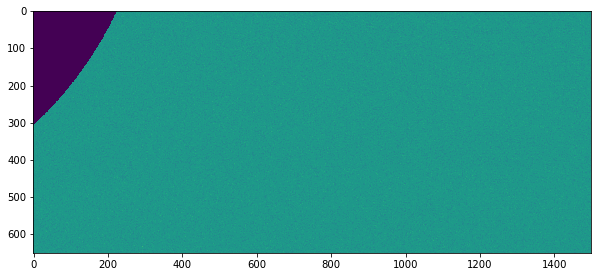

In [130]:
with h5netcdf.File(sample.ncdf_path, 'r') as f:
    print(f)
    print(f.variables['lat'][:])
    print(f.variables['lat_bounds'][:])
    print(f.variables['lat_bounds'][:].shape)
    
    topo = f.variables['ch1'][0, ::,::]

    # make image
    plt.figure(figsize=(10,10))
    plt.imshow(topo)#,origin='lower') 
    plt.savefig('image.png', bbox_inches=0)


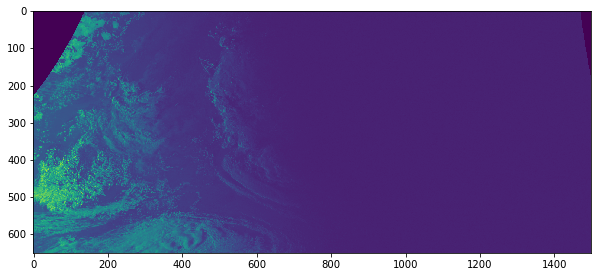

In [132]:
with h5netcdf.File(df_no_missing.iloc[20, :].ncdf_path, 'r') as f:
    topo = f.variables['ch1'][0, ::,::]

    # make image
    plt.figure(figsize=(10,10))
    plt.imshow(topo)#,origin='lower') 
    plt.savefig('image.png', bbox_inches=0)


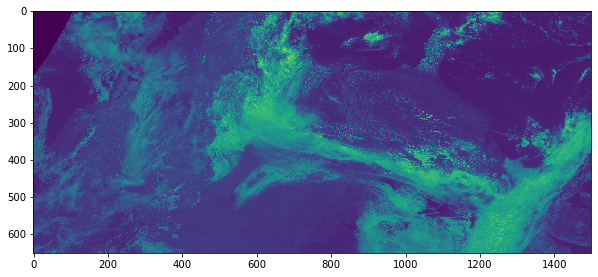

In [134]:
with h5netcdf.File(df_no_missing.iloc[150, :].ncdf_path, 'r') as f:
    topo = f.variables['ch1'][0, ::,::]

    # make image
    plt.figure(figsize=(10,10))
    plt.imshow(topo)#,origin='lower') 
    plt.savefig('image.png', bbox_inches=0)


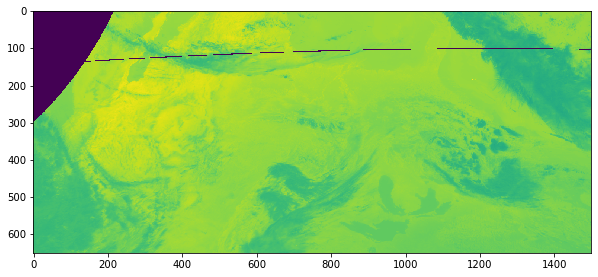

In [12]:
with h5netcdf.File(df_no_missing.iloc[1000, :].ncdf_path, 'r') as f:
    topo = f.variables['ch2'][0, ::,::]

    # make image
    plt.figure(figsize=(10,10))
    plt.imshow(topo)#,origin='lower') 
    plt.savefig('image.png', bbox_inches=0)


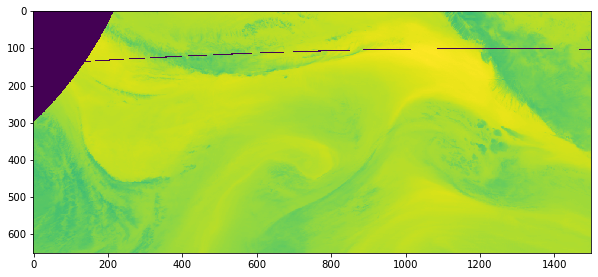

In [73]:
with h5netcdf.File(df_no_missing.iloc[1000, :].ncdf_path, 'r') as f:
    topo = f.variables['ch3'][0, ::,::]

    # make image
    plt.figure(figsize=(10,10))
    plt.imshow(topo)#,origin='lower') 
    plt.savefig('image.png', bbox_inches=0)


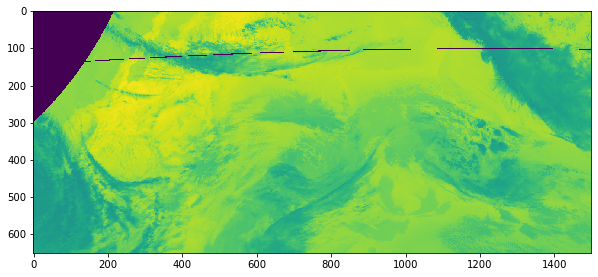

In [74]:
with h5netcdf.File(df_no_missing.iloc[1000, :].ncdf_path, 'r') as f:
    topo = f.variables['ch4'][0, ::,::]

    # make image
    plt.figure(figsize=(10,10))
    plt.imshow(topo)#,origin='lower') 
    plt.savefig('image.png', bbox_inches=0)


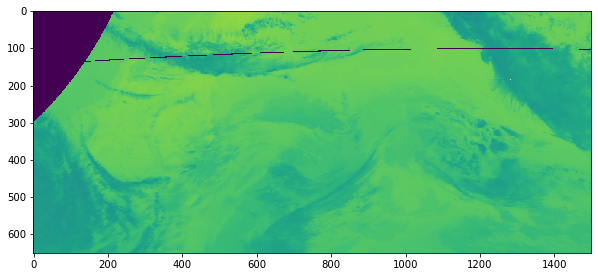

In [75]:
with h5netcdf.File(df_no_missing.iloc[1000, :].ncdf_path, 'r') as f:
    topo = f.variables['ch6'][0, ::,::]

    # make image
    plt.figure(figsize=(10,10))
    plt.imshow(topo)#,origin='lower') 
    plt.savefig('image.png', bbox_inches=0)


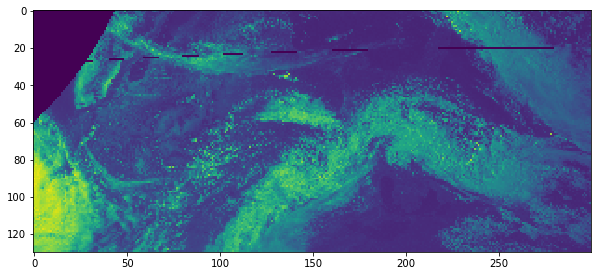

In [139]:
with h5netcdf.File(df_no_missing.iloc[1000, :].ncdf_path, 'r') as f:
    topo = f.variables['ch1'][0, ::5,::5] # Downsize

    # make image
    plt.figure(figsize=(10,10))
    plt.imshow(topo)#,origin='lower') 
    plt.savefig('image.png', bbox_inches=0)


# Conclusion so far on images

Random
- Some packages are required to use utils.py (cv2, tqdm, lz4, h5netcdf)

Missing data
- 17% of observations without images
- Field ncdf_path has got nan as string instead of np.nan
- Some hdf5 files but no ncdf file. All of these hdf5 are dummy files (i.e. none)
- You cannot load channel 5 in utils.py

hdf5 data
- Same resolutions for all channels and 8/16 bits: 650 * 1500
- As detailed in projects doc, hdf5 have got only one image per day instead of one every 15min
- Can be opened by utility.py

ncdf
- Recommandation is h5netcdf for multithread read access (also wheel for helios)
- Why this weird corner ?
- Cannot see anything ? Night ?
- Noise (like the line) ?


